# Example 7: Continual Learning


Setup: Our goal is to learn a 1D function from samples. The 1D function has 5 Gaussian peaks. Instead of presenting all samples to NN all at once, we have five phases of learning. In each phase only samples around one peak is presented to KAN. We find that KANs can do continual learning thanks to locality of splines.


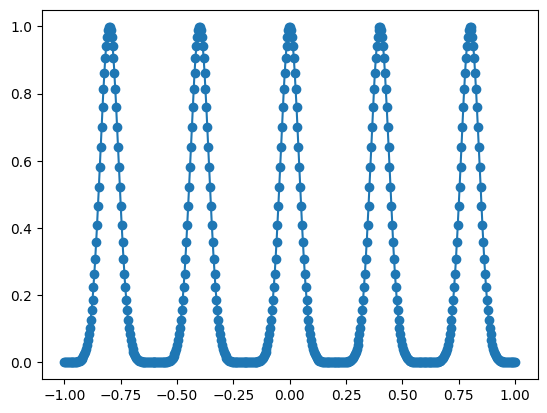

In [25]:
from lkan.models import KAN, MLP
from lkan.trainers import BasicKANTrainer, BasicMLPTrainer
from lkan.datamodule import OwnDataModule2
from lkan.loggers import PrintLogger
import numpy as np
import torch
import matplotlib.pyplot as plt

datasets = []

n_peak = 5
n_num_per_peak = 100
n_sample = n_peak * n_num_per_peak

x_grid = torch.linspace(-1, 1, steps=n_sample)

x_centers = 2 / n_peak * (np.arange(n_peak) - n_peak / 2 + 0.5)

x_sample = torch.stack(
    [
        torch.linspace(-1 / n_peak, 1 / n_peak, steps=n_num_per_peak) + center
        for center in x_centers
    ]
).reshape(
    -1,
)


y = 0.0
for center in x_centers:
    y += torch.exp(-((x_grid - center) ** 2) * 300)

y_sample = 0.0
for center in x_centers:
    y_sample += torch.exp(-((x_sample - center) ** 2) * 300)


plt.plot(x_grid.detach().numpy(), y.detach().numpy())
plt.scatter(x_sample.detach().numpy(), y_sample.detach().numpy())

Sequentially prensenting different peaks to KAN


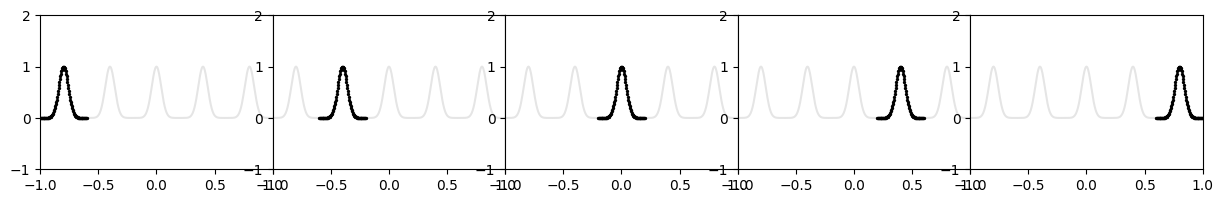

In [26]:
plt.subplots(1, 5, figsize=(15, 2))
plt.subplots_adjust(wspace=0, hspace=0)

for i in range(1, 6):
    plt.subplot(1, 5, i)
    group_id = i - 1
    plt.plot(x_grid.detach().numpy(), y.detach().numpy(), color="black", alpha=0.1)
    plt.scatter(
        x_sample[group_id * n_num_per_peak : (group_id + 1) * n_num_per_peak]
        .detach()
        .numpy(),
        y_sample[group_id * n_num_per_peak : (group_id + 1) * n_num_per_peak]
        .detach()
        .numpy(),
        color="black",
        s=2,
    )
    plt.xlim(-1, 1)
    plt.ylim(-1, 2)

Training KAN


In [48]:
# FFT version

ys = []


model = KAN([1, 1], grid_size=200, k=3, noise_scale=0.1, device="cpu", kan_layer_version="fft", bias=False, sp_trainable=False, sb_trainable=False)

for group_id in range(n_peak):
    x_ds = x_sample[group_id * n_num_per_peak : (group_id + 1) * n_num_per_peak][:, None]
    y_ds = y_sample[group_id * n_num_per_peak : (group_id + 1) * n_num_per_peak][:, None]
    dm = OwnDataModule2(16, x_ds, y_ds, x_ds, y_ds)
    trainer = BasicKANTrainer(model, lr=0.0005, logger=PrintLogger(100, 10), device="cpu")
    trainer.fit(dm, max_epochs=1000, max_steps=200)
    y_pred = model(x_grid[:,None])
    ys.append(y_pred.detach().numpy()[:,0])

Epoch: 0 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 32.89it/s]


Epoch: 1 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:01,  5.99it/s]

Step: 9 - Validation - Metrics:
train/metrics/loss: 0.24689649045467377
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 32.61it/s]


Epoch: 2 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:01,  5.90it/s]

Step: 19 - Validation - Metrics:
train/metrics/loss: 0.2165583223104477
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 33.01it/s]


Epoch: 3 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 31.39it/s]


Epoch: 4 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.90it/s]


Step: 29 - Validation - Metrics:
train/metrics/loss: 0.07664470374584198
train/lr: 0.0005


Epoch: 5 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.77it/s]


Step: 39 - Validation - Metrics:
train/metrics/loss: 0.048183269798755646
train/lr: 0.0005


Epoch: 6 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.05it/s]


Epoch: 7 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 28.57it/s]


Step: 50 - Validation - Metrics:
val/metrics/loss: 0.011510035023093224


Epoch: 8 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.92it/s]


Step: 59 - Validation - Metrics:
train/metrics/loss: 0.03730439022183418
train/lr: 0.0005


Epoch: 9 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.97it/s]

Step: 69 - Validation - Metrics:
train/metrics/loss: 0.018860381096601486
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 36.84it/s]


Epoch: 10 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.11it/s]


Epoch: 11 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.10it/s]


Step: 79 - Validation - Metrics:
train/metrics/loss: 0.003827562090009451
train/lr: 0.0005


Epoch: 12 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.44it/s]


Step: 89 - Validation - Metrics:
train/metrics/loss: 0.00023518213129136711
train/lr: 0.0005


Epoch: 13 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 39.15it/s]


Epoch: 14 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.79it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.0005127075128257275
train/lr: 0.0005


Epoch: 15 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.41it/s]


Step: 109 - Validation - Metrics:
train/metrics/loss: 0.0006283448310568929
train/lr: 0.0005


Epoch: 16 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 31.38it/s]


Epoch: 17 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.15it/s]

Step: 120 - Validation - Metrics:
val/metrics/loss: 0.0002274023718200624




100%|██████████| 7/7 [00:00<00:00, 33.67it/s]


Epoch: 18 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.20it/s]

Step: 129 - Validation - Metrics:
train/metrics/loss: 0.00022292982612270862
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 34.97it/s]


Epoch: 19 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:01,  5.85it/s]

Step: 139 - Validation - Metrics:
train/metrics/loss: 0.0002554635866545141
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 32.61it/s]


Epoch: 20 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.72it/s]


Epoch: 21 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.39it/s]

Step: 149 - Validation - Metrics:
train/metrics/loss: 7.255709351738915e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 34.64it/s]


Epoch: 22 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  7.00it/s]

Step: 159 - Validation - Metrics:
train/metrics/loss: 7.20704993000254e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 37.90it/s]


Epoch: 23 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.31it/s]


Epoch: 24 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.67it/s]


Step: 169 - Validation - Metrics:
train/metrics/loss: 0.00021272306912578642
train/lr: 0.0005


Epoch: 25 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.85it/s]


Step: 179 - Validation - Metrics:
train/metrics/loss: 8.217206050176173e-05
train/lr: 0.0005


Epoch: 26 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 39.05it/s]


Epoch: 27 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 39.01it/s]


Step: 190 - Validation - Metrics:
val/metrics/loss: 0.0004940180806443095


Epoch: 28 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.99it/s]

Step: 199 - Validation - Metrics:
train/metrics/loss: 2.074322765110992e-05
train/lr: 0.0005




 57%|█████▋    | 4/7 [00:00<00:00, 21.88it/s]

End...


Epoch: 0 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.05it/s]


Epoch: 1 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.20it/s]

Step: 9 - Validation - Metrics:
train/metrics/loss: 0.2195960283279419
train/lr: 0.0005




Epoch: 2 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  7.01it/s]

Step: 19 - Validation - Metrics:
train/metrics/loss: 0.2000095695257187
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 37.19it/s]


Epoch: 3 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 38.28it/s]


Epoch: 4 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.05it/s]

Step: 29 - Validation - Metrics:
train/metrics/loss: 0.10696101188659668
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 34.65it/s]


Epoch: 5 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.57it/s]

Step: 39 - Validation - Metrics:
train/metrics/loss: 0.09898518770933151
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 34.71it/s]


Epoch: 6 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.89it/s]


Epoch: 7 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:01,  5.77it/s]

Step: 50 - Validation - Metrics:
val/metrics/loss: 0.019382398575544357




100%|██████████| 7/7 [00:00<00:00, 32.75it/s]


Epoch: 8 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.67it/s]


Step: 59 - Validation - Metrics:
train/metrics/loss: 0.039847493171691895
train/lr: 0.0005


Epoch: 9 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.64it/s]

Step: 69 - Validation - Metrics:
train/metrics/loss: 0.021448267623782158
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 36.78it/s]


Epoch: 10 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.24it/s]


Epoch: 11 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.82it/s]


Step: 79 - Validation - Metrics:
train/metrics/loss: 0.0036402642726898193
train/lr: 0.0005


Epoch: 12 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.56it/s]


Step: 89 - Validation - Metrics:
train/metrics/loss: 0.00041635087109170854
train/lr: 0.0005


Epoch: 13 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.26it/s]


Epoch: 14 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.73it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.0007538521895185113
train/lr: 0.0005


Epoch: 15 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.07it/s]


Step: 109 - Validation - Metrics:
train/metrics/loss: 0.000396505871322006
train/lr: 0.0005


Epoch: 16 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.45it/s]


Epoch: 17 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.54it/s]


Step: 120 - Validation - Metrics:
val/metrics/loss: 0.00014421432570088655


Epoch: 18 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 29.86it/s]


Step: 129 - Validation - Metrics:
train/metrics/loss: 0.0002119779965141788
train/lr: 0.0005


Epoch: 19 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 31.04it/s]


Step: 139 - Validation - Metrics:
train/metrics/loss: 2.8211437893332914e-05
train/lr: 0.0005


Epoch: 20 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 31.38it/s]


Epoch: 21 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.41it/s]


Step: 149 - Validation - Metrics:
train/metrics/loss: 5.011204120819457e-05
train/lr: 0.0005


Epoch: 22 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.79it/s]

Step: 159 - Validation - Metrics:
train/metrics/loss: 2.731757194851525e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 37.22it/s]


Epoch: 23 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 38.83it/s]


Epoch: 24 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 27.58it/s]


Step: 169 - Validation - Metrics:
train/metrics/loss: 4.363123298389837e-05
train/lr: 0.0005


Epoch: 25 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 31.20it/s]


Step: 179 - Validation - Metrics:
train/metrics/loss: 2.819476867443882e-05
train/lr: 0.0005


Epoch: 26 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.64it/s]


Epoch: 27 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.07it/s]


Step: 190 - Validation - Metrics:
val/metrics/loss: 0.00033207942033186555


Epoch: 28 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.99it/s]

Step: 199 - Validation - Metrics:
train/metrics/loss: 9.035042239702307e-06
train/lr: 0.0005




 57%|█████▋    | 4/7 [00:00<00:00, 21.35it/s]

End...


Epoch: 0 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.60it/s]


Epoch: 1 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:01,  5.85it/s]

Step: 9 - Validation - Metrics:
train/metrics/loss: 0.1905641257762909
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 33.39it/s]


Epoch: 2 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.07it/s]

Step: 19 - Validation - Metrics:
train/metrics/loss: 0.1271122246980667
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 33.76it/s]


Epoch: 3 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.33it/s]


Epoch: 4 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.52it/s]

Step: 29 - Validation - Metrics:
train/metrics/loss: 0.04266464710235596
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 35.05it/s]


Epoch: 5 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.58it/s]


Step: 39 - Validation - Metrics:
train/metrics/loss: 0.026032045483589172
train/lr: 0.0005


Epoch: 6 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.13it/s]


Epoch: 7 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:01,  5.63it/s]

Step: 50 - Validation - Metrics:
val/metrics/loss: 0.0031473925337195396




100%|██████████| 7/7 [00:00<00:00, 32.33it/s]


Epoch: 8 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.99it/s]


Step: 59 - Validation - Metrics:
train/metrics/loss: 0.0024852862115949392
train/lr: 0.0005


Epoch: 9 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.71it/s]

Step: 69 - Validation - Metrics:
train/metrics/loss: 0.0001081404770957306
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 35.67it/s]


Epoch: 10 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.83it/s]


Epoch: 11 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.92it/s]


Step: 79 - Validation - Metrics:
train/metrics/loss: 0.000296281767077744
train/lr: 0.0005


Epoch: 12 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.93it/s]

Step: 89 - Validation - Metrics:
train/metrics/loss: 0.0003405543975532055
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 37.04it/s]


Epoch: 13 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.08it/s]


Epoch: 14 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.48it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 6.509794911835343e-05
train/lr: 0.0005


Epoch: 15 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.76it/s]

Step: 109 - Validation - Metrics:
train/metrics/loss: 7.153849583119154e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 37.62it/s]


Epoch: 16 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.76it/s]


Epoch: 17 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.36it/s]


Step: 120 - Validation - Metrics:
val/metrics/loss: 5.858914300915785e-05


Epoch: 18 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.91it/s]

Step: 129 - Validation - Metrics:
train/metrics/loss: 4.499791612033732e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 37.27it/s]


Epoch: 19 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  7.01it/s]

Step: 139 - Validation - Metrics:
train/metrics/loss: 6.769064930267632e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 37.36it/s]


Epoch: 20 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.13it/s]


Epoch: 21 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.21it/s]


Step: 149 - Validation - Metrics:
train/metrics/loss: 5.816852080897661e-06
train/lr: 0.0005


Epoch: 22 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  7.32it/s]

Step: 159 - Validation - Metrics:
train/metrics/loss: 1.302334749198053e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 40.09it/s]


Epoch: 23 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 32.53it/s]


Epoch: 24 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.36it/s]

Step: 169 - Validation - Metrics:
train/metrics/loss: 1.887119833554607e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 35.03it/s]


Epoch: 25 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:01,  5.76it/s]

Step: 179 - Validation - Metrics:
train/metrics/loss: 5.4675938372383825e-06
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 29.77it/s]


Epoch: 26 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.63it/s]


Epoch: 27 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.18it/s]

Step: 190 - Validation - Metrics:
val/metrics/loss: 1.8037637346424162e-05




100%|██████████| 7/7 [00:00<00:00, 33.64it/s]


Epoch: 28 / 1000
Training...


 57%|█████▋    | 4/7 [00:00<00:00, 14.44it/s]

Step: 199 - Validation - Metrics:
train/metrics/loss: 9.080799827643204e-06
train/lr: 0.0005


End...


Epoch: 0 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 30.46it/s]


Epoch: 1 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:01,  5.61it/s]

Step: 9 - Validation - Metrics:
train/metrics/loss: 0.061021145433187485
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 31.40it/s]


Epoch: 2 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.62it/s]

Step: 19 - Validation - Metrics:
train/metrics/loss: 0.014546647667884827
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 34.16it/s]


Epoch: 3 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.38it/s]


Epoch: 4 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.38it/s]

Step: 29 - Validation - Metrics:
train/metrics/loss: 0.0045764329843223095
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 34.55it/s]


Epoch: 5 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.00it/s]

Step: 39 - Validation - Metrics:
train/metrics/loss: 0.0011663883924484253
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 32.83it/s]


Epoch: 6 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.75it/s]


Epoch: 7 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:01,  5.46it/s]

Step: 50 - Validation - Metrics:
val/metrics/loss: 0.0003736937651410699




100%|██████████| 7/7 [00:00<00:00, 32.08it/s]


Epoch: 8 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.78it/s]

Step: 59 - Validation - Metrics:
train/metrics/loss: 0.00027980731101706624
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 37.56it/s]


Epoch: 9 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.83it/s]

Step: 69 - Validation - Metrics:
train/metrics/loss: 4.816636646864936e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 37.27it/s]


Epoch: 10 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.13it/s]


Epoch: 11 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.42it/s]

Step: 79 - Validation - Metrics:
train/metrics/loss: 8.949490438681096e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 34.46it/s]


Epoch: 12 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:01,  5.90it/s]

Step: 89 - Validation - Metrics:
train/metrics/loss: 0.00018258797354064882
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 31.73it/s]


Epoch: 13 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.05it/s]


Epoch: 14 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.53it/s]

Step: 99 - Validation - Metrics:
train/metrics/loss: 4.964991967426613e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 34.70it/s]


Epoch: 15 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.26it/s]

Step: 109 - Validation - Metrics:
train/metrics/loss: 1.0260590897814836e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 34.55it/s]


Epoch: 16 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 30.88it/s]


Epoch: 17 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.56it/s]


Step: 120 - Validation - Metrics:
val/metrics/loss: 5.897802111576311e-06


Epoch: 18 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.11it/s]


Step: 129 - Validation - Metrics:
train/metrics/loss: 1.4601507245970424e-05
train/lr: 0.0005


Epoch: 19 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.84it/s]


Step: 139 - Validation - Metrics:
train/metrics/loss: 3.171927801304264e-06
train/lr: 0.0005


Epoch: 20 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.11it/s]


Epoch: 21 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.01it/s]


Step: 149 - Validation - Metrics:
train/metrics/loss: 2.0557467905746307e-06
train/lr: 0.0005


Epoch: 22 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.88it/s]

Step: 159 - Validation - Metrics:
train/metrics/loss: 7.224139153549913e-06
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 37.13it/s]


Epoch: 23 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 26.25it/s]


Epoch: 24 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.40it/s]

Step: 169 - Validation - Metrics:
train/metrics/loss: 1.25460455819848e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 35.19it/s]


Epoch: 25 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.42it/s]

Step: 179 - Validation - Metrics:
train/metrics/loss: 3.5755808767135022e-06
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 34.74it/s]


Epoch: 26 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.91it/s]


Epoch: 27 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.70it/s]


Step: 190 - Validation - Metrics:
val/metrics/loss: 5.982007132843137e-05


Epoch: 28 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.77it/s]

Step: 199 - Validation - Metrics:
train/metrics/loss: 9.008062988868915e-06
train/lr: 0.0005




 57%|█████▋    | 4/7 [00:00<00:00, 21.11it/s]

End...


Epoch: 0 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.75it/s]

Epoch: 1 / 1000
Training...



100%|██████████| 7/7 [00:00<00:00, 36.75it/s]


Step: 9 - Validation - Metrics:
train/metrics/loss: 0.09804835170507431
train/lr: 0.0005


Epoch: 2 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.08it/s]


Step: 19 - Validation - Metrics:
train/metrics/loss: 0.049556899815797806
train/lr: 0.0005


Epoch: 3 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.78it/s]


Epoch: 4 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.18it/s]

Step: 29 - Validation - Metrics:
train/metrics/loss: 0.026026006788015366
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 34.62it/s]


Epoch: 5 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.24it/s]

Step: 39 - Validation - Metrics:
train/metrics/loss: 0.005432939622551203
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 34.74it/s]


Epoch: 6 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.30it/s]


Epoch: 7 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:01,  5.89it/s]

Step: 50 - Validation - Metrics:
val/metrics/loss: 0.0008279039757326245




100%|██████████| 7/7 [00:00<00:00, 33.12it/s]


Epoch: 8 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.10it/s]

Step: 59 - Validation - Metrics:
train/metrics/loss: 0.001206741202622652
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 34.23it/s]


Epoch: 9 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.11it/s]

Step: 69 - Validation - Metrics:
train/metrics/loss: 0.0006547846714965999
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 33.92it/s]


Epoch: 10 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.27it/s]


Epoch: 11 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.34it/s]

Step: 79 - Validation - Metrics:
train/metrics/loss: 0.0005535911186598241
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 34.82it/s]


Epoch: 12 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.05it/s]

Step: 89 - Validation - Metrics:
train/metrics/loss: 0.00017333593859802932
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 33.14it/s]


Epoch: 13 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.17it/s]


Epoch: 14 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.33it/s]

Step: 99 - Validation - Metrics:
train/metrics/loss: 9.440918802283704e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 34.85it/s]


Epoch: 15 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.13it/s]

Step: 109 - Validation - Metrics:
train/metrics/loss: 8.756496390560642e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 13.68it/s]


Epoch: 16 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.53it/s]


Epoch: 17 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.67it/s]

Step: 120 - Validation - Metrics:
val/metrics/loss: 3.2870666473172605e-05




100%|██████████| 7/7 [00:00<00:00, 34.58it/s]


Epoch: 18 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 28.07it/s]


Step: 129 - Validation - Metrics:
train/metrics/loss: 6.515945278806612e-05
train/lr: 0.0005


Epoch: 19 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 24.64it/s]


Step: 139 - Validation - Metrics:
train/metrics/loss: 2.4913788365665823e-05
train/lr: 0.0005


Epoch: 20 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.04it/s]


Epoch: 21 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.06it/s]

Step: 149 - Validation - Metrics:
train/metrics/loss: 1.8311031453777105e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 33.64it/s]


Epoch: 22 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.15it/s]

Step: 159 - Validation - Metrics:
train/metrics/loss: 6.454073445638642e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 34.55it/s]


Epoch: 23 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.56it/s]


Epoch: 24 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.19it/s]

Step: 169 - Validation - Metrics:
train/metrics/loss: 5.4935870139161125e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 34.07it/s]


Epoch: 25 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.81it/s]

Step: 179 - Validation - Metrics:
train/metrics/loss: 1.4523420759360306e-05
train/lr: 0.0005




100%|██████████| 7/7 [00:00<00:00, 36.58it/s]


Epoch: 26 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.86it/s]


Epoch: 27 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.27it/s]


Step: 190 - Validation - Metrics:
val/metrics/loss: 0.00028689776081591845


Epoch: 28 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.47it/s]

Step: 199 - Validation - Metrics:
train/metrics/loss: 7.773458492010832e-06
train/lr: 0.0005




 57%|█████▋    | 4/7 [00:00<00:00, 20.40it/s]


End...


In [22]:
# "2" version

ys = []

model = KAN([1, 1], grid_size=200, k=3, noise_scale=0.1, device="cpu", kan_layer_version="2", bias=False, sp_trainable=False, sb_trainable=False)

for group_id in range(n_peak):
    x_ds = x_sample[group_id * n_num_per_peak : (group_id + 1) * n_num_per_peak][:, None]
    y_ds = y_sample[group_id * n_num_per_peak : (group_id + 1) * n_num_per_peak][:, None]
    dm = OwnDataModule2(16, x_ds, y_ds, x_ds, y_ds)
    trainer = BasicKANTrainer(model, lr=0.01, logger=PrintLogger(100, 10), device="cpu") 
    trainer.fit(dm, max_epochs=1000, max_steps=200)
    y_pred = model(x_grid[:,None])
    ys.append(y_pred.detach().numpy()[:,0])

Epoch: 0 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.82it/s]


Epoch: 1 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.98it/s]


Step: 9 - Validation - Metrics:
train/metrics/loss: 0.1757766157388687
train/lr: 0.01


Epoch: 2 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.71it/s]

Step: 19 - Validation - Metrics:
train/metrics/loss: 0.21141532063484192
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 36.36it/s]


Epoch: 3 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.08it/s]


Epoch: 4 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.55it/s]


Step: 29 - Validation - Metrics:
train/metrics/loss: 0.1801142692565918
train/lr: 0.01


Epoch: 5 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.89it/s]

Step: 39 - Validation - Metrics:
train/metrics/loss: 0.24794387817382812
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 37.61it/s]


Epoch: 6 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.02it/s]


Epoch: 7 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 26.57it/s]


Step: 50 - Validation - Metrics:
val/metrics/loss: 0.0003941430477425456


Epoch: 8 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.96it/s]

Step: 59 - Validation - Metrics:
train/metrics/loss: 0.2684175372123718
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 37.13it/s]


Epoch: 9 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.02it/s]


Step: 69 - Validation - Metrics:
train/metrics/loss: 0.02441355399787426
train/lr: 0.01


Epoch: 10 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 38.21it/s]


Epoch: 11 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.84it/s]


Step: 79 - Validation - Metrics:
train/metrics/loss: 0.05760367214679718
train/lr: 0.01


Epoch: 12 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.09it/s]


Step: 89 - Validation - Metrics:
train/metrics/loss: 0.0681028738617897
train/lr: 0.01


Epoch: 13 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 38.39it/s]


Epoch: 14 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.82it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.056927964091300964
train/lr: 0.01


Epoch: 15 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.79it/s]

Step: 109 - Validation - Metrics:
train/metrics/loss: 0.06600967049598694
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 36.42it/s]


Epoch: 16 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.93it/s]


Epoch: 17 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 38.47it/s]


Step: 120 - Validation - Metrics:
val/metrics/loss: 0.16248317062854767


Epoch: 18 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.25it/s]


Step: 129 - Validation - Metrics:
train/metrics/loss: 0.0225028358399868
train/lr: 0.01


Epoch: 19 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.57it/s]

Step: 139 - Validation - Metrics:
train/metrics/loss: 1.845853375925799e-06
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 36.65it/s]


Epoch: 20 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.37it/s]


Epoch: 21 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.56it/s]


Step: 149 - Validation - Metrics:
train/metrics/loss: 0.012624667957425117
train/lr: 0.01


Epoch: 22 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.40it/s]


Step: 159 - Validation - Metrics:
train/metrics/loss: 0.008244924247264862
train/lr: 0.01


Epoch: 23 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 29.61it/s]


Epoch: 24 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.04it/s]


Step: 169 - Validation - Metrics:
train/metrics/loss: 0.01971909962594509
train/lr: 0.01


Epoch: 25 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.67it/s]

Step: 179 - Validation - Metrics:
train/metrics/loss: 0.01767229661345482
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 36.63it/s]


Epoch: 26 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.49it/s]


Epoch: 27 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.42it/s]


Step: 190 - Validation - Metrics:
val/metrics/loss: 6.421531679734471e-07


Epoch: 28 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.66it/s]

Step: 199 - Validation - Metrics:
train/metrics/loss: 0.016267765313386917
train/lr: 0.01




 57%|█████▋    | 4/7 [00:00<00:00, 22.04it/s]

End...


Epoch: 0 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.24it/s]


Epoch: 1 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.31it/s]


Step: 9 - Validation - Metrics:
train/metrics/loss: 0.12381000071763992
train/lr: 0.01


Epoch: 2 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.79it/s]

Step: 19 - Validation - Metrics:
train/metrics/loss: 0.07812295109033585
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 37.16it/s]


Epoch: 3 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.81it/s]


Epoch: 4 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.14it/s]


Step: 29 - Validation - Metrics:
train/metrics/loss: 0.18371142446994781
train/lr: 0.01


Epoch: 5 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.61it/s]


Step: 39 - Validation - Metrics:
train/metrics/loss: 0.06943379342556
train/lr: 0.01


Epoch: 6 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.68it/s]


Epoch: 7 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:01,  5.78it/s]

Step: 50 - Validation - Metrics:
val/metrics/loss: 0.00013824040070176125




100%|██████████| 7/7 [00:00<00:00, 33.38it/s]


Epoch: 8 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.38it/s]


Step: 59 - Validation - Metrics:
train/metrics/loss: 0.12083180248737335
train/lr: 0.01


Epoch: 9 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.80it/s]

Step: 69 - Validation - Metrics:
train/metrics/loss: 5.723044159822166e-05
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 36.99it/s]


Epoch: 10 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 28.25it/s]


Epoch: 11 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.34it/s]


Step: 79 - Validation - Metrics:
train/metrics/loss: 0.052171941846609116
train/lr: 0.01


Epoch: 12 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.70it/s]

Step: 89 - Validation - Metrics:
train/metrics/loss: 0.05061087757349014
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 36.65it/s]


Epoch: 13 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.88it/s]


Epoch: 14 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.78it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.02611420676112175
train/lr: 0.01


Epoch: 15 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.45it/s]


Step: 109 - Validation - Metrics:
train/metrics/loss: 0.023221081122756004
train/lr: 0.01


Epoch: 16 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.98it/s]


Epoch: 17 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.21it/s]


Step: 120 - Validation - Metrics:
val/metrics/loss: 0.10262385755777359


Epoch: 18 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.41it/s]


Step: 129 - Validation - Metrics:
train/metrics/loss: 0.02090136520564556
train/lr: 0.01


Epoch: 19 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.63it/s]


Step: 139 - Validation - Metrics:
train/metrics/loss: 0.03832479193806648
train/lr: 0.01


Epoch: 20 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.11it/s]


Epoch: 21 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.19it/s]


Step: 149 - Validation - Metrics:
train/metrics/loss: 0.018563929945230484
train/lr: 0.01


Epoch: 22 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.34it/s]

Step: 159 - Validation - Metrics:
train/metrics/loss: 0.02327001839876175
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 35.15it/s]


Epoch: 23 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.90it/s]


Epoch: 24 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.59it/s]


Step: 169 - Validation - Metrics:
train/metrics/loss: 0.00016921568021643907
train/lr: 0.01


Epoch: 25 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.11it/s]


Step: 179 - Validation - Metrics:
train/metrics/loss: 0.007841333746910095
train/lr: 0.01


Epoch: 26 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.16it/s]


Epoch: 27 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.47it/s]


Step: 190 - Validation - Metrics:
val/metrics/loss: 7.704572624334105e-08


Epoch: 28 / 1000
Training...


 57%|█████▋    | 4/7 [00:00<00:00, 17.31it/s]

Step: 199 - Validation - Metrics:
train/metrics/loss: 0.003869079751893878
train/lr: 0.01


End...


Epoch: 0 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.46it/s]


Epoch: 1 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.68it/s]


Step: 9 - Validation - Metrics:
train/metrics/loss: 0.08460821956396103
train/lr: 0.01


Epoch: 2 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.53it/s]


Step: 19 - Validation - Metrics:
train/metrics/loss: 0.20205657184123993
train/lr: 0.01


Epoch: 3 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.30it/s]


Epoch: 4 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.31it/s]


Step: 29 - Validation - Metrics:
train/metrics/loss: 0.027148345485329628
train/lr: 0.01


Epoch: 5 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.59it/s]

Step: 39 - Validation - Metrics:
train/metrics/loss: 0.05209694802761078
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 36.51it/s]


Epoch: 6 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.79it/s]


Epoch: 7 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:01,  5.71it/s]

Step: 50 - Validation - Metrics:
val/metrics/loss: 1.4222150639398023e-05




100%|██████████| 7/7 [00:00<00:00, 33.09it/s]


Epoch: 8 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.73it/s]

Step: 59 - Validation - Metrics:
train/metrics/loss: 0.04596487432718277
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 37.40it/s]


Epoch: 9 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.45it/s]


Step: 69 - Validation - Metrics:
train/metrics/loss: 0.019763918593525887
train/lr: 0.01


Epoch: 10 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.80it/s]


Epoch: 11 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.58it/s]


Step: 79 - Validation - Metrics:
train/metrics/loss: 0.0351608470082283
train/lr: 0.01


Epoch: 12 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.77it/s]

Step: 89 - Validation - Metrics:
train/metrics/loss: 0.018695859238505363
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 36.80it/s]


Epoch: 13 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.49it/s]


Epoch: 14 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.58it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.042797405272722244
train/lr: 0.01


Epoch: 15 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 29.28it/s]


Step: 109 - Validation - Metrics:
train/metrics/loss: 0.02159607969224453
train/lr: 0.01


Epoch: 16 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.99it/s]


Epoch: 17 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 38.83it/s]


Step: 120 - Validation - Metrics:
val/metrics/loss: 0.05643889680504799


Epoch: 18 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.75it/s]

Step: 129 - Validation - Metrics:
train/metrics/loss: 0.005152483470737934
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 37.42it/s]


Epoch: 19 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.58it/s]

Step: 139 - Validation - Metrics:
train/metrics/loss: 2.1727869352616835e-06
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 35.80it/s]


Epoch: 20 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.39it/s]


Epoch: 21 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.26it/s]


Step: 149 - Validation - Metrics:
train/metrics/loss: 0.008074292913079262
train/lr: 0.01


Epoch: 22 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  7.05it/s]

Step: 159 - Validation - Metrics:
train/metrics/loss: 0.0014157135738059878
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 37.73it/s]


Epoch: 23 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.03it/s]


Epoch: 24 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.17it/s]

Step: 169 - Validation - Metrics:
train/metrics/loss: 0.004110847599804401
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 34.88it/s]


Epoch: 25 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.53it/s]

Step: 179 - Validation - Metrics:
train/metrics/loss: 0.0053657726384699345
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 36.60it/s]


Epoch: 26 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.77it/s]


Epoch: 27 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.57it/s]


Step: 190 - Validation - Metrics:
val/metrics/loss: 5.739263642112746e-08


Epoch: 28 / 1000
Training...


 57%|█████▋    | 4/7 [00:00<00:00, 20.88it/s]

Step: 199 - Validation - Metrics:
train/metrics/loss: 0.0025663883425295353
train/lr: 0.01


End...


Epoch: 0 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.08it/s]


Epoch: 1 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.28it/s]


Step: 9 - Validation - Metrics:
train/metrics/loss: 0.06454424560070038
train/lr: 0.01


Epoch: 2 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.48it/s]

Step: 19 - Validation - Metrics:
train/metrics/loss: 0.051349058747291565
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 36.06it/s]


Epoch: 3 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.26it/s]


Epoch: 4 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.59it/s]


Step: 29 - Validation - Metrics:
train/metrics/loss: 0.04404124990105629
train/lr: 0.01


Epoch: 5 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.71it/s]

Step: 39 - Validation - Metrics:
train/metrics/loss: 0.04241884872317314
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 36.60it/s]


Epoch: 6 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 30.79it/s]


Epoch: 7 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:01,  5.76it/s]

Step: 50 - Validation - Metrics:
val/metrics/loss: 2.6828154659597203e-05




100%|██████████| 7/7 [00:00<00:00, 32.55it/s]


Epoch: 8 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.99it/s]


Step: 59 - Validation - Metrics:
train/metrics/loss: 0.0304504856467247
train/lr: 0.01


Epoch: 9 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.86it/s]

Step: 69 - Validation - Metrics:
train/metrics/loss: 0.0006199743947945535
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 38.64it/s]


Epoch: 10 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.59it/s]


Epoch: 11 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 39.17it/s]


Step: 79 - Validation - Metrics:
train/metrics/loss: 0.010610866360366344
train/lr: 0.01


Epoch: 12 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.92it/s]

Step: 89 - Validation - Metrics:
train/metrics/loss: 0.01172199472784996
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 37.71it/s]


Epoch: 13 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.72it/s]


Epoch: 14 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 39.38it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.005995355546474457
train/lr: 0.01


Epoch: 15 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.95it/s]

Step: 109 - Validation - Metrics:
train/metrics/loss: 3.331538027850911e-05
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 36.61it/s]


Epoch: 16 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.73it/s]


Epoch: 17 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:01,  5.48it/s]

Step: 120 - Validation - Metrics:
val/metrics/loss: 0.009198406711220741




100%|██████████| 7/7 [00:00<00:00, 31.26it/s]


Epoch: 18 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  7.13it/s]

Step: 129 - Validation - Metrics:
train/metrics/loss: 0.0023989661131054163
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 37.87it/s]


Epoch: 19 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.82it/s]

Step: 139 - Validation - Metrics:
train/metrics/loss: 1.084021050701267e-06
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 37.86it/s]


Epoch: 20 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.36it/s]


Epoch: 21 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.93it/s]


Step: 149 - Validation - Metrics:
train/metrics/loss: 0.0012869044439867139
train/lr: 0.01


Epoch: 22 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  7.06it/s]

Step: 159 - Validation - Metrics:
train/metrics/loss: 2.4430471967207268e-05
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 37.71it/s]


Epoch: 23 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 38.80it/s]


Epoch: 24 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.62it/s]


Step: 169 - Validation - Metrics:
train/metrics/loss: 0.00028622569516301155
train/lr: 0.01


Epoch: 25 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.99it/s]


Step: 179 - Validation - Metrics:
train/metrics/loss: 0.0005497053498402238
train/lr: 0.01


Epoch: 26 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.54it/s]


Epoch: 27 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.72it/s]


Step: 190 - Validation - Metrics:
val/metrics/loss: 1.4980452760937624e-05


Epoch: 28 / 1000
Training...


 57%|█████▋    | 4/7 [00:00<00:00, 20.91it/s]

Step: 199 - Validation - Metrics:
train/metrics/loss: 7.300007564481348e-05
train/lr: 0.01


End...


Epoch: 0 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.43it/s]


Epoch: 1 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.75it/s]


Step: 9 - Validation - Metrics:
train/metrics/loss: 0.17575237154960632
train/lr: 0.01


Epoch: 2 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.72it/s]

Step: 19 - Validation - Metrics:
train/metrics/loss: 0.08938124030828476
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 36.85it/s]


Epoch: 3 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.46it/s]


Epoch: 4 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 38.59it/s]


Step: 29 - Validation - Metrics:
train/metrics/loss: 0.06503939628601074
train/lr: 0.01


Epoch: 5 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.53it/s]


Step: 39 - Validation - Metrics:
train/metrics/loss: 0.05071358010172844
train/lr: 0.01


Epoch: 6 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.93it/s]


Epoch: 7 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 26.36it/s]


Step: 50 - Validation - Metrics:
val/metrics/loss: 0.004728337749838829


Epoch: 8 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.74it/s]

Step: 59 - Validation - Metrics:
train/metrics/loss: 0.027381939813494682
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 36.50it/s]


Epoch: 9 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.82it/s]


Step: 69 - Validation - Metrics:
train/metrics/loss: 0.0503871776163578
train/lr: 0.01


Epoch: 10 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.37it/s]


Epoch: 11 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 38.09it/s]


Step: 79 - Validation - Metrics:
train/metrics/loss: 0.011201360262930393
train/lr: 0.01


Epoch: 12 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.91it/s]

Step: 89 - Validation - Metrics:
train/metrics/loss: 0.007604038342833519
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 38.62it/s]


Epoch: 13 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.48it/s]


Epoch: 14 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.48it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.003498442005366087
train/lr: 0.01


Epoch: 15 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.29it/s]


Step: 109 - Validation - Metrics:
train/metrics/loss: 0.0012752184411510825
train/lr: 0.01


Epoch: 16 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.49it/s]


Epoch: 17 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 39.02it/s]


Step: 120 - Validation - Metrics:
val/metrics/loss: 0.0001863293582573533


Epoch: 18 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.55it/s]

Step: 129 - Validation - Metrics:
train/metrics/loss: 0.00027749271248467267
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 36.51it/s]


Epoch: 19 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.48it/s]


Step: 139 - Validation - Metrics:
train/metrics/loss: 0.00017305172514170408
train/lr: 0.01


Epoch: 20 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.41it/s]


Epoch: 21 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.33it/s]


Step: 149 - Validation - Metrics:
train/metrics/loss: 3.881033990182914e-05
train/lr: 0.01


Epoch: 22 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.90it/s]

Step: 159 - Validation - Metrics:
train/metrics/loss: 4.2444436985533684e-05
train/lr: 0.01




100%|██████████| 7/7 [00:00<00:00, 37.96it/s]


Epoch: 23 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.56it/s]


Epoch: 24 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.20it/s]


Step: 169 - Validation - Metrics:
train/metrics/loss: 3.489201844786294e-05
train/lr: 0.01


Epoch: 25 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.50it/s]


Step: 179 - Validation - Metrics:
train/metrics/loss: 2.224034324171953e-05
train/lr: 0.01


Epoch: 26 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.54it/s]


Epoch: 27 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.40it/s]


Step: 190 - Validation - Metrics:
val/metrics/loss: 0.002859286731109023


Epoch: 28 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  7.04it/s]

Step: 199 - Validation - Metrics:
train/metrics/loss: 1.5537416402366944e-05
train/lr: 0.01




 57%|█████▋    | 4/7 [00:00<00:00, 22.35it/s]

End...


In [46]:
# MLP version

ys = []

model = MLP([1,50,20,10,1], device="cpu")

for group_id in range(n_peak):
    x_ds = x_sample[group_id * n_num_per_peak : (group_id + 1) * n_num_per_peak][:, None]
    y_ds = y_sample[group_id * n_num_per_peak : (group_id + 1) * n_num_per_peak][:, None]
    dm = OwnDataModule2(16, x_ds, y_ds, x_ds, y_ds)
    trainer = BasicKANTrainer(model, lr=0.01, logger=PrintLogger(100, 100), device="cpu") 
    trainer.fit(dm, max_epochs=1000, max_steps=400)
    y_pred = model(x_grid[:,None])
    ys.append(y_pred.detach().numpy()[:,0])

Epoch: 0 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.93it/s]


Epoch: 1 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.28it/s]


Epoch: 2 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.69it/s]


Epoch: 3 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.58it/s]


Epoch: 4 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.95it/s]


Epoch: 5 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.72it/s]


Epoch: 6 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.16it/s]


Epoch: 7 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 30.72it/s]


Epoch: 8 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.66it/s]


Epoch: 9 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.42it/s]


Epoch: 10 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.43it/s]


Epoch: 11 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.66it/s]


Epoch: 12 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.93it/s]


Epoch: 13 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.51it/s]


Epoch: 14 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.39it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.12382181733846664
train/lr: 0.015


Epoch: 15 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.17it/s]


Epoch: 16 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.22it/s]


Epoch: 17 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.34it/s]


Epoch: 18 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.54it/s]


Epoch: 19 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.70it/s]


Epoch: 20 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.20it/s]


Epoch: 21 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.27it/s]


Epoch: 22 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.34it/s]


Epoch: 23 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.57it/s]


Epoch: 24 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.43it/s]


Epoch: 25 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.47it/s]


Epoch: 26 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.54it/s]


Epoch: 27 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.49it/s]


Epoch: 28 / 1000
Training...


 57%|█████▋    | 4/7 [00:00<00:00, 21.01it/s]

Step: 199 - Validation - Metrics:
train/metrics/loss: 0.0400082990527153
train/lr: 0.015


End...


Epoch: 0 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.81it/s]


Epoch: 1 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.36it/s]


Epoch: 2 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.26it/s]


Epoch: 3 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.88it/s]


Epoch: 4 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.76it/s]


Epoch: 5 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.56it/s]


Epoch: 6 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.83it/s]


Epoch: 7 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 30.08it/s]


Epoch: 8 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.63it/s]


Epoch: 9 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.06it/s]


Epoch: 10 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.45it/s]


Epoch: 11 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.23it/s]


Epoch: 12 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.29it/s]


Epoch: 13 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.75it/s]


Epoch: 14 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.62it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.016603633761405945
train/lr: 0.015


Epoch: 15 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.77it/s]


Epoch: 16 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.62it/s]


Epoch: 17 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 27.60it/s]


Epoch: 18 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.87it/s]


Epoch: 19 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.03it/s]


Epoch: 20 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.76it/s]


Epoch: 21 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.44it/s]


Epoch: 22 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.71it/s]


Epoch: 23 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.05it/s]


Epoch: 24 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 29.02it/s]


Epoch: 25 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.26it/s]


Epoch: 26 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.92it/s]


Epoch: 27 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.27it/s]


Epoch: 28 / 1000
Training...


 57%|█████▋    | 4/7 [00:00<00:00, 20.73it/s]

Step: 199 - Validation - Metrics:
train/metrics/loss: 0.0025210650637745857
train/lr: 0.015


End...


Epoch: 0 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.38it/s]


Epoch: 1 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.30it/s]


Epoch: 2 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.71it/s]


Epoch: 3 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.23it/s]


Epoch: 4 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.99it/s]


Epoch: 5 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.96it/s]


Epoch: 6 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.96it/s]


Epoch: 7 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 29.62it/s]


Epoch: 8 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.62it/s]


Epoch: 9 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.90it/s]


Epoch: 10 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.66it/s]


Epoch: 11 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.85it/s]


Epoch: 12 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.03it/s]


Epoch: 13 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.25it/s]


Epoch: 14 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.59it/s]


Step: 99 - Validation - Metrics:
train/metrics/loss: 0.023722892627120018
train/lr: 0.015


Epoch: 15 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.61it/s]


Epoch: 16 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.69it/s]


Epoch: 17 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.49it/s]


Epoch: 18 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.33it/s]


Epoch: 19 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.25it/s]


Epoch: 20 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.34it/s]


Epoch: 21 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.04it/s]


Epoch: 22 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.83it/s]


Epoch: 23 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.97it/s]


Epoch: 24 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.19it/s]


Epoch: 25 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.09it/s]


Epoch: 26 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.34it/s]


Epoch: 27 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.67it/s]


Epoch: 28 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.35it/s]

Step: 199 - Validation - Metrics:
train/metrics/loss: 0.004370004869997501
train/lr: 0.015




 57%|█████▋    | 4/7 [00:00<00:00, 19.87it/s]

End...


Epoch: 0 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.00it/s]


Epoch: 1 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.72it/s]


Epoch: 2 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.83it/s]


Epoch: 3 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.91it/s]


Epoch: 4 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 29.23it/s]


Epoch: 5 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.77it/s]


Epoch: 6 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.14it/s]


Epoch: 7 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 31.31it/s]


Epoch: 8 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.63it/s]


Epoch: 9 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.59it/s]


Epoch: 10 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.77it/s]


Epoch: 11 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.52it/s]


Epoch: 12 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.73it/s]


Epoch: 13 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.36it/s]


Epoch: 14 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.56it/s]

Step: 99 - Validation - Metrics:
train/metrics/loss: 0.0589589923620224
train/lr: 0.015




100%|██████████| 7/7 [00:00<00:00, 34.72it/s]


Epoch: 15 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.47it/s]


Epoch: 16 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.83it/s]


Epoch: 17 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.91it/s]


Epoch: 18 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.08it/s]


Epoch: 19 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.81it/s]


Epoch: 20 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.44it/s]


Epoch: 21 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.17it/s]


Epoch: 22 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.61it/s]


Epoch: 23 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.79it/s]


Epoch: 24 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.84it/s]


Epoch: 25 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.28it/s]


Epoch: 26 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.17it/s]


Epoch: 27 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.65it/s]


Epoch: 28 / 1000
Training...


 57%|█████▋    | 4/7 [00:00<00:00, 21.27it/s]

Step: 199 - Validation - Metrics:
train/metrics/loss: 0.026775237172842026
train/lr: 0.015


End...


Epoch: 0 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.82it/s]


Epoch: 1 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.50it/s]


Epoch: 2 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.86it/s]


Epoch: 3 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.17it/s]


Epoch: 4 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.28it/s]


Epoch: 5 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.32it/s]


Epoch: 6 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.48it/s]


Epoch: 7 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 32.31it/s]


Epoch: 8 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 28.99it/s]


Epoch: 9 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.67it/s]


Epoch: 10 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.07it/s]


Epoch: 11 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.78it/s]


Epoch: 12 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 37.46it/s]


Epoch: 13 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.12it/s]


Epoch: 14 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.48it/s]

Step: 99 - Validation - Metrics:
train/metrics/loss: 0.05390049144625664
train/lr: 0.015




100%|██████████| 7/7 [00:00<00:00, 34.15it/s]


Epoch: 15 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.90it/s]


Epoch: 16 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.87it/s]


Epoch: 17 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.51it/s]


Epoch: 18 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.86it/s]


Epoch: 19 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.38it/s]


Epoch: 20 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.27it/s]


Epoch: 21 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 34.47it/s]


Epoch: 22 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.52it/s]


Epoch: 23 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.54it/s]


Epoch: 24 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.88it/s]


Epoch: 25 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 35.42it/s]


Epoch: 26 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 33.28it/s]


Epoch: 27 / 1000
Training...


100%|██████████| 7/7 [00:00<00:00, 36.04it/s]


Epoch: 28 / 1000
Training...


 14%|█▍        | 1/7 [00:00<00:00,  6.44it/s]

Step: 199 - Validation - Metrics:
train/metrics/loss: 0.11405878514051437
train/lr: 0.015




 57%|█████▋    | 4/7 [00:00<00:00, 20.00it/s]

End...


Prediction of KAN after each stage


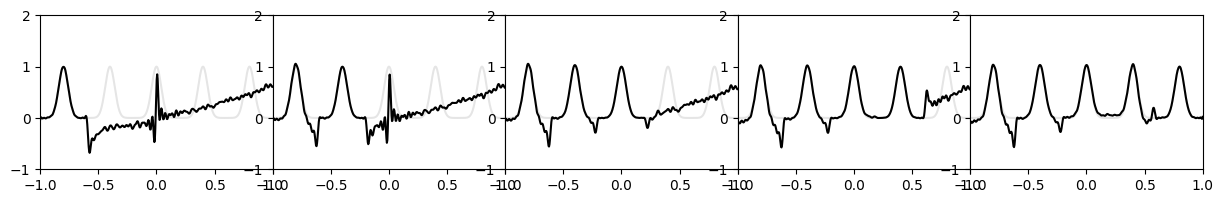

In [49]:
plt.subplots(1, 5, figsize=(15, 2))
plt.subplots_adjust(wspace=0, hspace=0)

for i in range(1, 6):
    plt.subplot(1, 5, i)
    group_id = i - 1
    plt.plot(x_grid.detach().numpy(), y.detach().numpy(), color="black", alpha=0.1)
    plt.plot(x_grid.detach().numpy(), ys[i - 1], color="black")
    plt.xlim(-1, 1)
    plt.ylim(-1, 2)
    
# not ideal, but probably because of Adam optimizer (original use LBFGS) but I don't tested this.
# KanLinear2 > KanLinearFFT >> MLP in terms of catastrophic forgetting (I think)